In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches for custom legends
import seaborn as sns
from scipy import stats
import datetime as datetime

capital_bike_daily_weather = pd.read_csv('CBS_2021-2023_Daily_Weather.csv')
#capital_bike_full_dtset = pd.read_csv('CBS_2021-2023_Full.csv')


In [378]:
capital_bike_daily_weather.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [379]:
capital_bike_daily_weather.tail()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8
1094,2839,2023-12-31,4488,7327,-8.9,-4.6,0,10.2


In [380]:
capital_bike_daily_weather.reset_index(drop=True)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8


In [381]:
capital_bike_daily_weather.dtypes

Casual                              int64
Date                               object
Member                              int64
Total_rides                         int64
apparent_temperature_mean (°C)    float64
temperature_2m_mean (°C)          float64
weathercode (wmo code)              int64
windspeed_10m_max (km/h)          float64
dtype: object

In [382]:
capital_bike_daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [383]:
capital_bike_daily_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Casual,1095.0,3836.715068,2114.895305,174.0,2122.00,3595.0,5321.00,12839.0
Member,1095.0,5929.492237,2419.273171,323.0,4292.50,5848.0,7577.00,12580.0
Total_rides,1095.0,9766.207306,4129.630135,497.0,6741.50,9759.0,13020.00,20174.0
apparent_temperature_mean (°C),1095.0,12.836438,11.889420,-15.2,2.70,13.1,23.40,34.7
temperature_2m_mean (°C),1095.0,14.412785,9.667675,-9.1,6.25,14.9,22.75,34.7
weathercode (wmo code),1095.0,24.391781,27.774440,0.0,1.00,3.0,53.00,75.0
windspeed_10m_max (km/h),1095.0,16.051050,5.880358,5.6,11.70,14.7,19.40,40.1


In [384]:
capital_bike_daily_weather.isnull().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

In [385]:
#Checking for duplicates
capital_bike_daily_weather.duplicated().sum()

np.int64(0)

In [386]:
#Check for objects or strings in the data if there are any
object_col = capital_bike_daily_weather.select_dtypes(include="object").columns
capital_bike_daily_weather[object_col].head()

,Date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05


In [387]:
#Check for objects or strings in the data if there are any
string_col = capital_bike_daily_weather.select_dtypes(include="string").columns
capital_bike_daily_weather[string_col].head()

""
0
1
2
3
4


In [388]:
# Check the shape of the data set
print(capital_bike_daily_weather.shape)

(1095, 8)


In [389]:
capital_bike_daily_weather.isna()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False
1092,False,False,False,False,False,False,False,False
1093,False,False,False,False,False,False,False,False


In [390]:
capital_bike_daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [391]:
# Ensure the Date column is in datetime format 
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Extract the year from the Date column and create a new column 'Year'
capital_bike_daily_weather['Year'] = capital_bike_daily_weather['Date'].dt.year

# Check the result
print(capital_bike_daily_weather[['Date', 'Year']].head())

        Date  Year
0 2021-01-01  2021
1 2021-01-02  2021
2 2021-01-03  2021
3 2021-01-04  2021
4 2021-01-05  2021


In [392]:
# Ensure the Date column is in datetime format 
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Extract the year from the Date column and create a new column 'Year'
capital_bike_daily_weather['Day'] = capital_bike_daily_weather['Date'].dt.day_name()

# Check the result
print(capital_bike_daily_weather[['Date', 'Day']].head())

        Date       Day
0 2021-01-01    Friday
1 2021-01-02  Saturday
2 2021-01-03    Sunday
3 2021-01-04    Monday
4 2021-01-05   Tuesday


In [393]:
# Ensure Date column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Function to convert month to season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply function to Date column to create a new 'Season' column
capital_bike_daily_weather['Season'] = capital_bike_daily_weather['Date'].apply(get_season)


In [394]:
print(capital_bike_daily_weather['Season'].head())
print(capital_bike_daily_weather['Season'].tail())

0    Winter
1    Winter
2    Winter
3    Winter
4    Winter
Name: Season, dtype: object
1090    Winter
1091    Winter
1092    Winter
1093    Winter
1094    Winter
Name: Season, dtype: object


In [395]:
capital_bike_daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   Year                            1095 non-null   int32         
 9   Day                             1095 non-null   object        
 10  Season                          1095 non-null   object        
dtypes: d

In [396]:
weather_count = capital_bike_daily_weather['weathercode (wmo code)'].nunique()
print("Number of unique values in 'weathercode (wmo code)':", weather_count)

Number of unique values in 'weathercode (wmo code)': 13


In [397]:
weather_value_counts = capital_bike_daily_weather['weathercode (wmo code)'].value_counts()
print("Frequency of each value in 'weathercode (wmo code)':\n", weather_value_counts)

Frequency of each value in 'weathercode (wmo code)':
 weathercode (wmo code)
3     232
1     198
51    143
2     135
63     87
0      87
61     81
53     61
55     28
73     14
71     10
65     10
75      9
Name: count, dtype: int64


In [398]:
# Create a dictionary to map weather codes to weather descriptions
weather_code_map = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Cloudy",
    51: "Light rain showers",
    53: "Moderate rain showers",
    55: "Heavy rain showers",
    61: "Light rain",
    63: "Moderate rain",
    65: "Heavy rain",
    71: "Light snow",
    73: "Moderate snow",
    75: "Heavy snow"
}

# Map the weather codes to weather names
capital_bike_daily_weather['Weather_Name'] = capital_bike_daily_weather['weathercode (wmo code)'].map(weather_code_map)

# Check the result
print(capital_bike_daily_weather[['weathercode (wmo code)', 'Weather_Name']].head())
capital_bike_daily_weather.info()

   weathercode (wmo code)        Weather_Name
0                      63       Moderate rain
1                      61          Light rain
2                      63       Moderate rain
3                       3              Cloudy
4                      51  Light rain showers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   

In [399]:
capital_bike_daily_weather.tail()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Year,Day,Season,Weather_Name
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,2023,Wednesday,Winter,Light snow
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,2023,Thursday,Winter,Clear sky
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,2023,Friday,Winter,Mainly clear
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,2023,Saturday,Winter,Mainly clear
1094,2839,2023-12-31,4488,7327,-8.9,-4.6,0,10.2,2023,Sunday,Winter,Clear sky


In [400]:
temperature_count = capital_bike_daily_weather['temperature_2m_mean (°C)'].nunique()
print("Number of unique values in 'temperature_2m_mean (°C)	':", temperature_count)

Number of unique values in 'temperature_2m_mean (°C)	': 350


In [401]:
weather_value_counts = capital_bike_daily_weather['temperature_2m_mean (°C)'].value_counts()
print("Frequency of each value in 'temperature_2m_mean (°C)':\n", weather_value_counts)

Frequency of each value in 'temperature_2m_mean (°C)':
 temperature_2m_mean (°C)
 15.2    10
 26.8    10
 20.0     9
 24.3     8
 6.7      8
         ..
 0.3      1
 15.1     1
 25.7     1
-0.5      1
-4.6      1
Name: count, Length: 350, dtype: int64


In [402]:
#Define the temperature categorization function
def categorize_temperature(temp):
    if temp < 0:
        return 'Very Cold'
    elif 0 <= temp < 10:
        return 'Cold'
    elif 10 <= temp < 20:
        return 'Cool'
    elif 20 <= temp < 30:
        return 'Normal'
    elif 30 <= temp < 40:
        return 'Hot'
    else:
        return 'Very Hot'

#Apply this function to the 'temperature_2m_mean (°C)' column
capital_bike_daily_weather['Temperature_Category'] = capital_bike_daily_weather['temperature_2m_mean (°C)'].apply(categorize_temperature)

# Step 3: Check the results
print(capital_bike_daily_weather[['temperature_2m_mean (°C)', 'Temperature_Category']].head())


   temperature_2m_mean (°C) Temperature_Category
0                       2.3                 Cold
1                       7.6                 Cold
2                       3.9                 Cold
3                       4.1                 Cold
4                       4.0                 Cold


In [403]:
#Define the temperature categorization function
def categorize_temperature(temp):
    if temp < 0:
        return 'Very Cold'
    elif 0 <= temp < 10:
        return 'Cold'
    elif 10 <= temp < 20:
        return 'Cool'
    elif 20 <= temp < 30:
        return 'Normal'
    elif 30 <= temp < 40:
        return 'Hot'
    else:
        return 'Very Hot'

#Apply this function to the 'temperature_2m_mean (°C)' column
capital_bike_daily_weather['Feel like'] = capital_bike_daily_weather['apparent_temperature_mean (°C)'].apply(categorize_temperature)

#Check the results
print(capital_bike_daily_weather[['apparent_temperature_mean (°C)', 'Feel like']].head())


   apparent_temperature_mean (°C)  Feel like
0                            -0.9  Very Cold
1                             4.8       Cold
2                             0.9       Cold
3                             1.0       Cold
4                             1.4       Cold


In [404]:
capital_bike_daily_weather.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Year,Day,Season,Weather_Name,Temperature_Category,Feel like
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,Friday,Winter,Moderate rain,Cold,Very Cold
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,Saturday,Winter,Light rain,Cold,Cold
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,Sunday,Winter,Moderate rain,Cold,Cold
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,Monday,Winter,Cloudy,Cold,Cold
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,Tuesday,Winter,Light rain showers,Cold,Cold


In [405]:
wind_speed = capital_bike_daily_weather['windspeed_10m_max (km/h)'].nunique()
print("Wind speed:", wind_speed)

Wind speed: 239


In [406]:
wind_speed = capital_bike_daily_weather['windspeed_10m_max (km/h)'].value_counts()
print("Frequency of each value in 'Hour':\n", wind_speed)

Frequency of each value in 'Hour':
 windspeed_10m_max (km/h)
13.0    18
11.3    17
10.2    17
12.0    15
14.0    14
        ..
9.3      1
27.2     1
6.3      1
7.5      1
7.2      1
Name: count, Length: 239, dtype: int64


In [407]:
#Define the wind speed categorization function
def categorize_wind_speed(speed):
    if speed < 5:
        return 'Calm'
    elif 5 <= speed < 15:
        return 'Light Breeze'
    elif 15 <= speed < 25:
        return 'Moderate Breeze'
    elif 25 <= speed < 40:
        return 'Windy'
    elif 40 <= speed < 60:
        return 'Very Windy'
    else:
        return 'Stormy'

#Apply this function to the 'windspeed_10m_max (km/h)' column
capital_bike_daily_weather['Wind_Speed_Category'] = capital_bike_daily_weather['windspeed_10m_max (km/h)'].apply(categorize_wind_speed)

#Check the results
print(capital_bike_daily_weather[['windspeed_10m_max (km/h)', 'Wind_Speed_Category']].head())


   windspeed_10m_max (km/h) Wind_Speed_Category
0                      10.6        Light Breeze
1                      19.1     Moderate Breeze
2                      13.0        Light Breeze
3                      13.3        Light Breeze
4                       9.2        Light Breeze


In [408]:
capital_bike_daily_weather.head(10)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Year,Day,Season,Weather_Name,Temperature_Category,Feel like,Wind_Speed_Category
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,Friday,Winter,Moderate rain,Cold,Very Cold,Light Breeze
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,Saturday,Winter,Light rain,Cold,Cold,Moderate Breeze
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,Sunday,Winter,Moderate rain,Cold,Cold,Light Breeze
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,Monday,Winter,Cloudy,Cold,Cold,Light Breeze
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,Tuesday,Winter,Light rain showers,Cold,Cold,Light Breeze
5,1359,2021-01-06,1753,3112,-1.1,3.4,3,20.8,2021,Wednesday,Winter,Cloudy,Cold,Very Cold,Moderate Breeze
6,1167,2021-01-07,2143,3310,-1.3,2.9,3,14.4,2021,Thursday,Winter,Cloudy,Cold,Very Cold,Light Breeze
7,784,2021-01-08,2203,2987,-3.1,0.7,3,12.9,2021,Friday,Winter,Cloudy,Cold,Very Cold,Light Breeze
8,1490,2021-01-09,2582,4072,-3.8,1.7,2,19.4,2021,Saturday,Winter,Partly cloudy,Cold,Very Cold,Moderate Breeze
9,1479,2021-01-10,2522,4001,-1.8,2.6,1,18.7,2021,Sunday,Winter,Mainly clear,Cold,Very Cold,Moderate Breeze


In [409]:
# Define your list of holiday dates
holidays = {
    '2021-01-01': 'New Year\'s Day',
    '2021-01-18': 'Martin Luther King Jr. Day',
    '2021-02-15': 'Presidents\' Day',
    '2021-05-31': 'Memorial Day',
    '2021-07-04': 'Independence Day',
    '2021-09-06': 'Labor Day',
    '2021-10-11': 'Columbus Day',
    '2021-11-11': 'Veterans Day',
    '2021-11-25': 'Thanksgiving Day',
    '2021-12-25': 'Christmas Day',
    '2022-01-01': 'New Year\'s Day',
    '2022-01-17': 'Martin Luther King Jr. Day',
    '2022-02-21': 'Presidents\' Day',
    '2022-05-30': 'Memorial Day',
    '2022-07-04': 'Independence Day',
    '2022-09-05': 'Labor Day',
    '2022-10-10': 'Columbus Day',
    '2022-11-11': 'Veterans Day',
    '2022-11-24': 'Thanksgiving Day',
    '2022-12-25': 'Christmas Day',
    '2023-01-01': 'New Year\'s Day',
    '2023-01-16': 'Martin Luther King Jr. Day',
    '2023-02-20': 'Presidents\' Day',
    '2023-05-29': 'Memorial Day',
    '2023-07-04': 'Independence Day',
    '2023-09-04': 'Labor Day',
    '2023-10-09': 'Columbus Day',
    '2023-11-11': 'Veterans Day',
    '2023-11-23': 'Thanksgiving Day',
    '2023-12-25': 'Christmas Day'
}

# Convert the keys to a set of datetime objects for easy comparison
holiday_dates = set(pd.to_datetime(list(holidays.keys())))

# Create the new 'Holiday' column with 'Yes' for holidays, 'No' otherwise
capital_bike_daily_weather['Holiday'] = capital_bike_daily_weather['Date'].apply(lambda date: 'Yes' if date in holiday_dates else 'No')

# Check the result
print(capital_bike_daily_weather[['Date', 'Holiday']].head(10))

        Date Holiday
0 2021-01-01     Yes
1 2021-01-02      No
2 2021-01-03      No
3 2021-01-04      No
4 2021-01-05      No
5 2021-01-06      No
6 2021-01-07      No
7 2021-01-08      No
8 2021-01-09      No
9 2021-01-10      No


In [410]:
capital_bike_daily_weather.tail(24)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Year,Day,Season,Weather_Name,Temperature_Category,Feel like,Wind_Speed_Category,Holiday
1071,3708,2023-12-08,8764,12472,-2.5,1.3,3,9.8,2023,Friday,Winter,Cloudy,Cold,Very Cold,Light Breeze,No
1072,5162,2023-12-09,8350,13512,-2.7,1.6,2,12.4,2023,Saturday,Winter,Partly cloudy,Cold,Very Cold,Light Breeze,No
1073,1326,2023-12-10,3230,4556,-4.7,0.1,3,19.4,2023,Sunday,Winter,Cloudy,Cold,Very Cold,Moderate Breeze,No
1074,2171,2023-12-11,7287,9458,-7.3,-3.2,1,11.5,2023,Monday,Winter,Mainly clear,Very Cold,Very Cold,Light Breeze,No
1075,2597,2023-12-12,8492,11089,-1.3,4.4,3,26.2,2023,Tuesday,Winter,Cloudy,Cold,Very Cold,Windy,No
1076,2927,2023-12-13,8455,11382,-6.8,-1.0,3,27.0,2023,Wednesday,Winter,Cloudy,Very Cold,Very Cold,Windy,No
1077,2907,2023-12-14,7884,10791,-11.9,-6.8,3,13.2,2023,Thursday,Winter,Cloudy,Very Cold,Very Cold,Light Breeze,No
1078,3552,2023-12-15,8231,11783,-12.5,-8.2,3,10.4,2023,Friday,Winter,Cloudy,Very Cold,Very Cold,Light Breeze,No
1079,4696,2023-12-16,7576,12272,-12.9,-8.7,3,8.7,2023,Saturday,Winter,Cloudy,Very Cold,Very Cold,Light Breeze,No
1080,2044,2023-12-17,3976,6020,-11.5,-7.4,0,10.9,2023,Sunday,Winter,Clear sky,Very Cold,Very Cold,Light Breeze,No


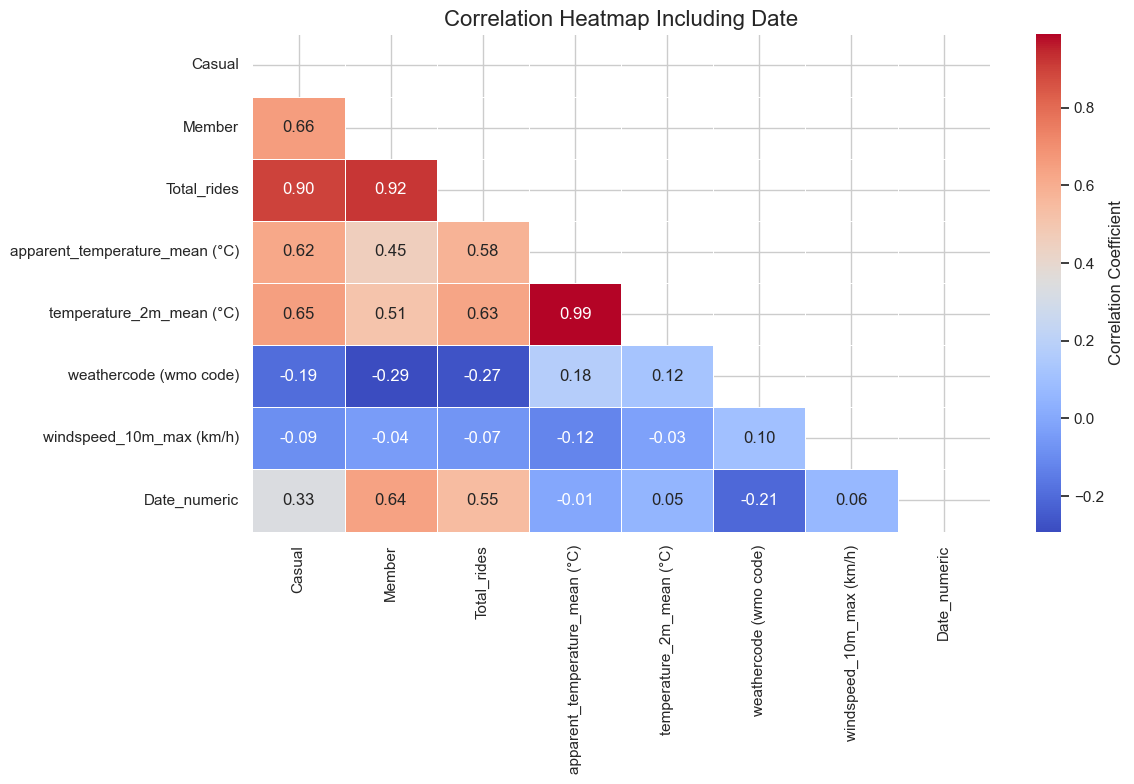

In [411]:
# Ensure 'Date' is converted to datetime
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Create a new column with numeric representation of 'Date' (e.g., days since start)
capital_bike_daily_weather['Date_numeric'] = (capital_bike_daily_weather['Date'] - capital_bike_daily_weather['Date'].min()).dt.days

# Extract numeric columns from the dataset
numeric_data = capital_bike_daily_weather.select_dtypes(include=['float64', 'int64']).copy()

# Include the 'Date_numeric' column
numeric_data['Date_numeric'] = capital_bike_daily_weather['Date_numeric']

#Compute the correlation matrix
correlation_matrix = numeric_data.corr()

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    mask=mask,  # Apply the mask
    annot=True,  # Show correlation coefficients
    fmt=".2f",  # Format the numbers to two decimal places
    cmap="coolwarm",  # Color map
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}  # Label for color bar
)

# Add title for clarity
plt.title('Correlation Heatmap Including Date', fontsize=16)

# Show the heatmap
plt.tight_layout()
plt.show()


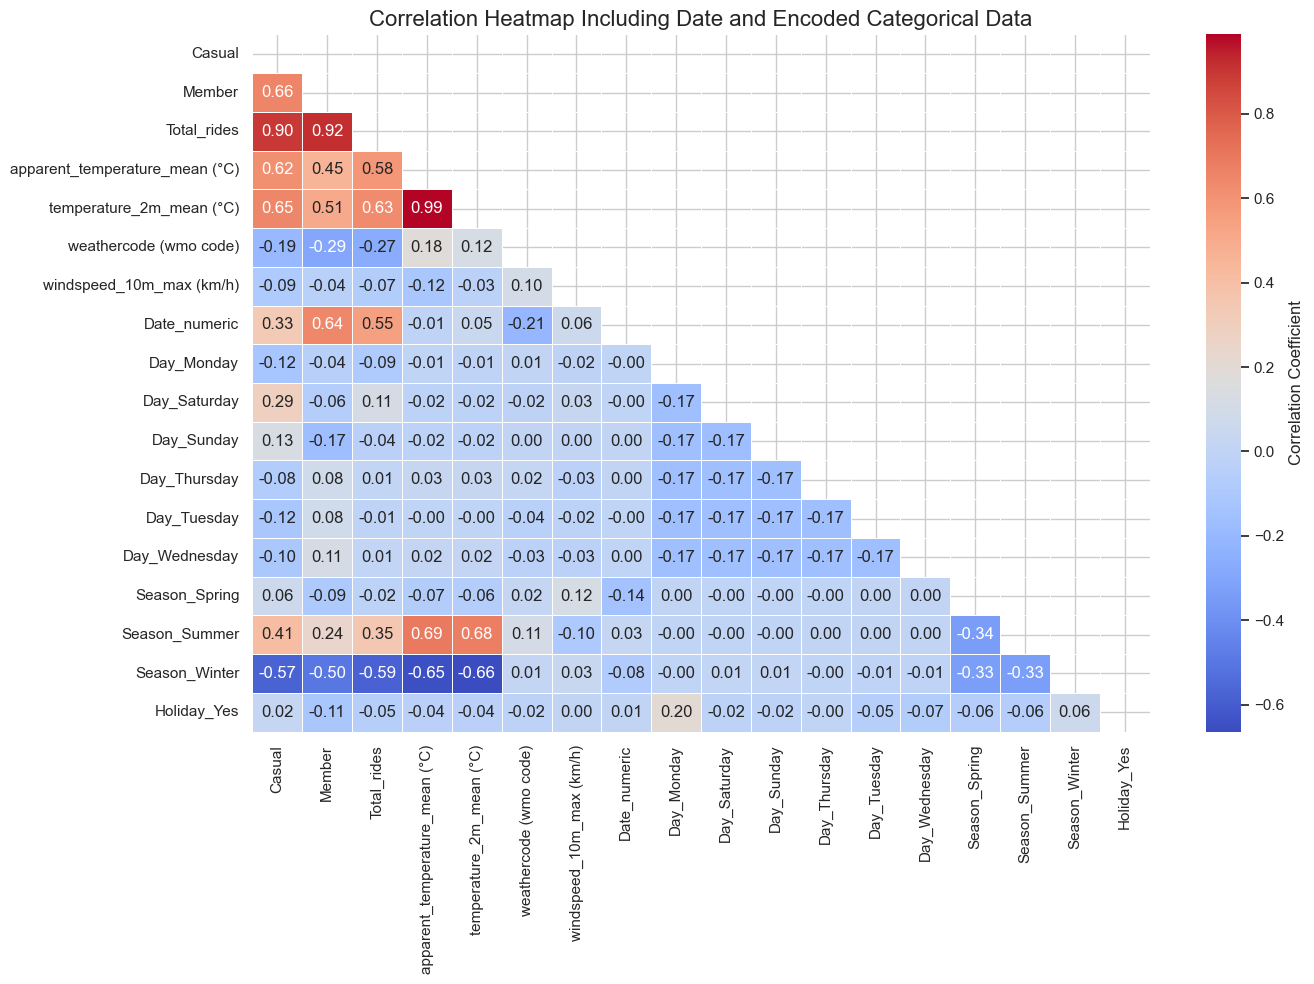

In [412]:
#Transforming and include in the heat map the 'Day', 'Season' and 'Holiday' columns which are strings values. 
# Ensure 'Date' is converted to datetime
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Create a new column with numeric representation of 'Date' (e.g., days since start)
capital_bike_daily_weather['Date_numeric'] = (capital_bike_daily_weather['Date'] - capital_bike_daily_weather['Date'].min()).dt.days

# Encode categorical columns
# 'Day', 'Season', and 'Holiday' are assumed to exist in the dataset
encoded_data = pd.get_dummies(capital_bike_daily_weather[['Day', 'Season', 'Holiday']], drop_first=True)

#Extract numeric columns from the dataset
numeric_data = capital_bike_daily_weather.select_dtypes(include=['float64', 'int64']).copy()

# Include the 'Date_numeric' column and encoded categorical data
numeric_data['Date_numeric'] = capital_bike_daily_weather['Date_numeric']
numeric_data = pd.concat([numeric_data, encoded_data], axis=1)

#Compute the correlation matrix
correlation_matrix = numeric_data.corr()

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Plot the heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size
sns.heatmap(
    correlation_matrix, 
    mask=mask,  # Apply the mask
    annot=True,  # Show correlation coefficients
    fmt=".2f",  # Format the numbers to two decimal places
    cmap="coolwarm",  # Color map
    linewidths=0.5,  # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}  # Label for color bar
)

# Add title for clarity
plt.title('Correlation Heatmap Including Date and Encoded Categorical Data', fontsize=16)

# Show the heatmap
plt.tight_layout()
plt.show()


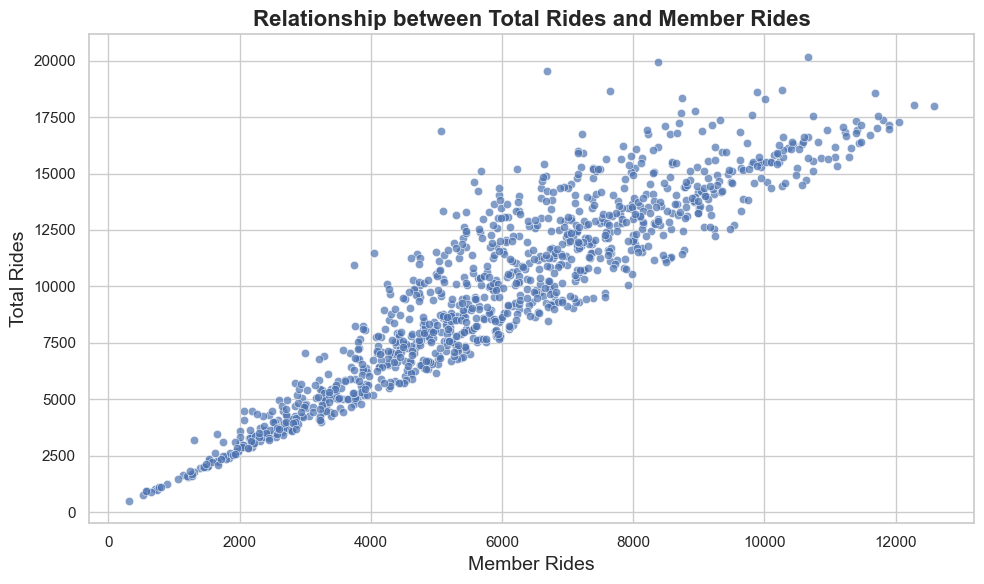

In [413]:
# Set a style for better aesthetics
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=capital_bike_daily_weather,  
    x="Member", 
    y="Total_rides", 
    alpha=0.7,  # Add some transparency to better visualize overlapping points
    color="#4c72b0"  # Choose a distinct color
)

# Add labels and title
plt.title("Relationship between Total Rides and Member Rides", fontsize=16, fontweight='bold')
plt.xlabel("Member Rides", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


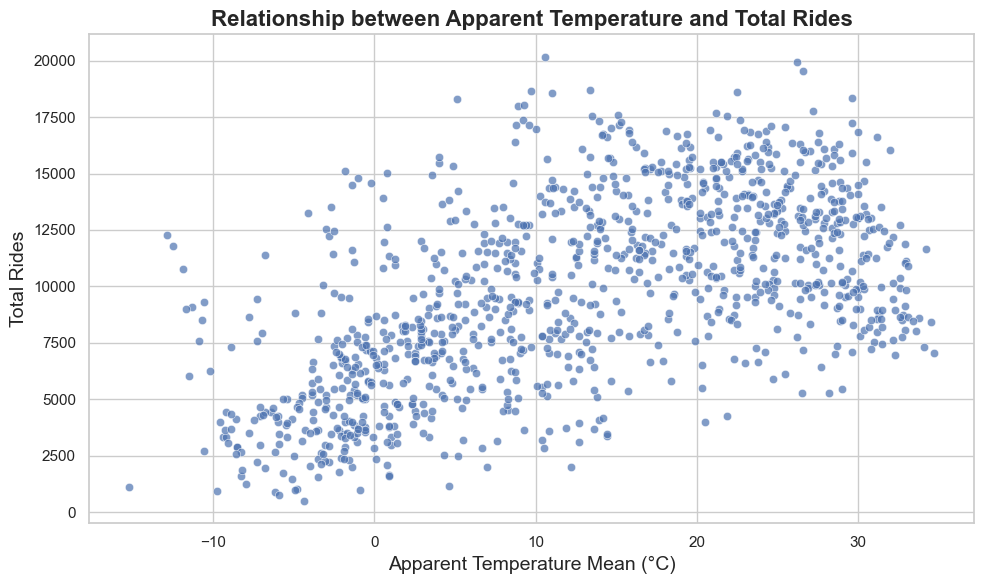

In [414]:
# Ensure the correct column name (strip spaces or tabs if needed)
capital_bike_daily_weather.columns = capital_bike_daily_weather.columns.str.strip()

# Set a style for better aesthetics
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=capital_bike_daily_weather,  
    x="apparent_temperature_mean (°C)",  # Corrected column name
    y="Total_rides", 
    alpha=0.7,  # Transparency
    color="#4c72b0"  # Consistent color
)

# Add labels and title
plt.title("Relationship between Apparent Temperature and Total Rides", fontsize=16, fontweight='bold')
plt.xlabel("Apparent Temperature Mean (°C)", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


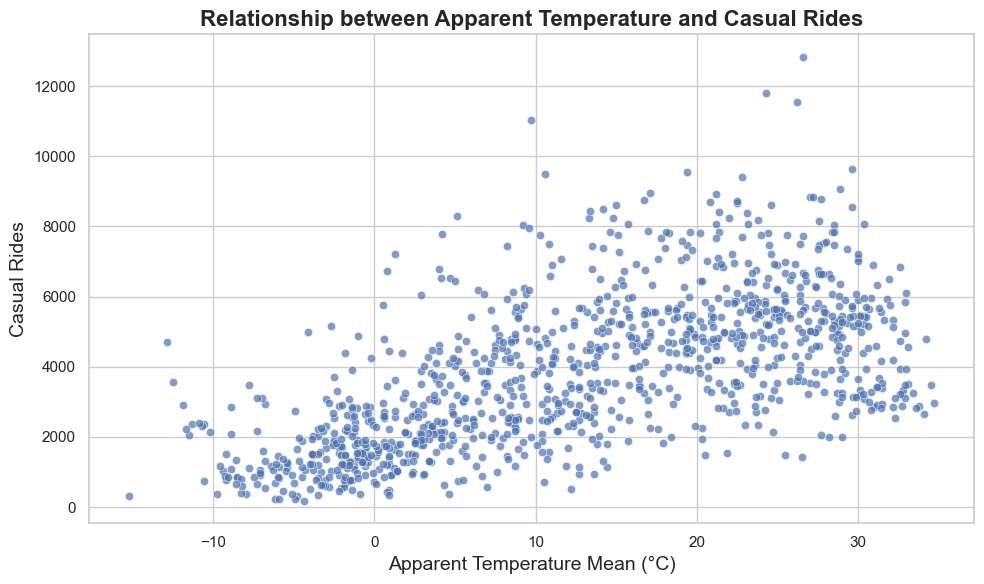

In [415]:
# Ensure the correct column name (strip spaces or tabs if needed)
capital_bike_daily_weather.columns = capital_bike_daily_weather.columns.str.strip()

# Set a style for better aesthetics
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=capital_bike_daily_weather,  
    x="apparent_temperature_mean (°C)",  # Corrected column name
    y="Casual", 
    alpha=0.7,  # Transparency
    color="#4c72b0"  # Consistent color
)

# Add labels and title
plt.title("Relationship between Apparent Temperature and Casual Rides", fontsize=16, fontweight='bold')
plt.xlabel("Apparent Temperature Mean (°C)", fontsize=14)
plt.ylabel("Casual Rides", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

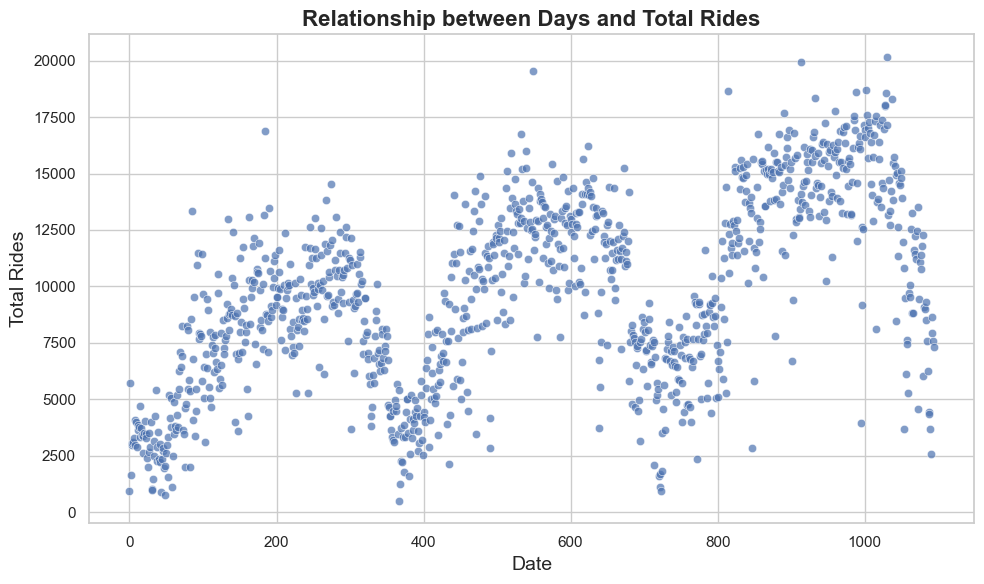

In [416]:
# Ensure the correct column name (strip spaces or tabs if needed)
capital_bike_daily_weather.columns = capital_bike_daily_weather.columns.str.strip()

# Set a style for better aesthetics
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=capital_bike_daily_weather,  
    x="Date_numeric",  # Ensure this column exists
    y="Total_rides",  # Corrected column name
    alpha=0.7,  # Transparency
    color="#4c72b0"  # Consistent color
)

# Add labels and title
plt.title("Relationship between Days and Total Rides", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


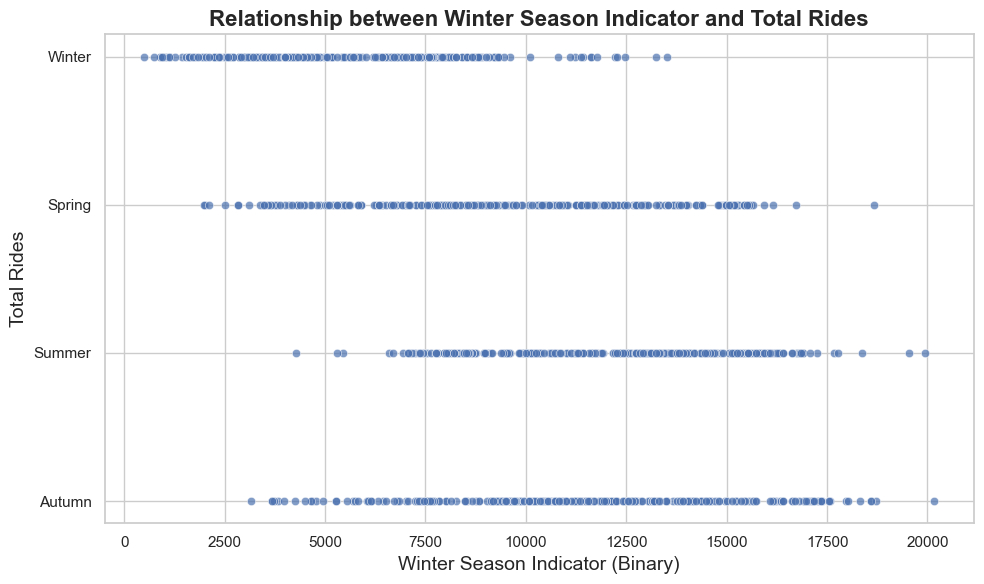

In [417]:
# Ensure the correct column name (strip spaces or tabs if needed)
capital_bike_daily_weather.columns = capital_bike_daily_weather.columns.str.strip()

# Set a style for better aesthetics
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=capital_bike_daily_weather,  
    y="Season",  # Ensure this column exists
    x="Total_rides",  # Corrected column name
    alpha=0.7,  # Transparency
    color="#4c72b0"  # Consistent color
)

# Add labels and title
plt.title("Relationship between Winter Season Indicator and Total Rides", fontsize=16, fontweight='bold')
plt.xlabel("Winter Season Indicator (Binary)", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


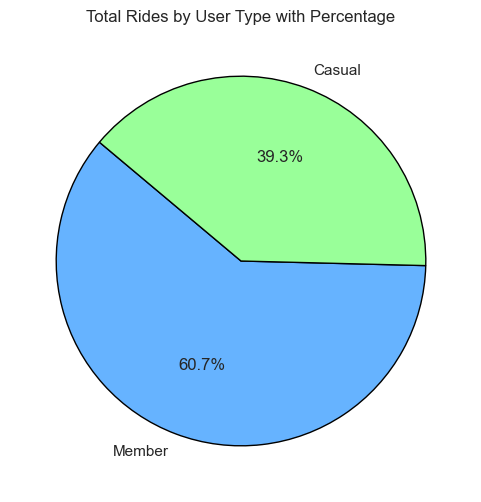

In [418]:
# Calculate the total rides for 'Member' and 'Casual'
total_member = capital_bike_daily_weather['Member'].sum()
total_casual = capital_bike_daily_weather['Casual'].sum()

# Data for pie chart
labels = ['Member', 'Casual']
sizes = [total_member, total_casual]
colors = ['#66b3ff', '#99ff99']  # Color scheme

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Total Rides by User Type with Percentage')
plt.show()

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_53735/3910649390.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_rides, x='Day_of_Week', y='Total_rides', palette='viridis')


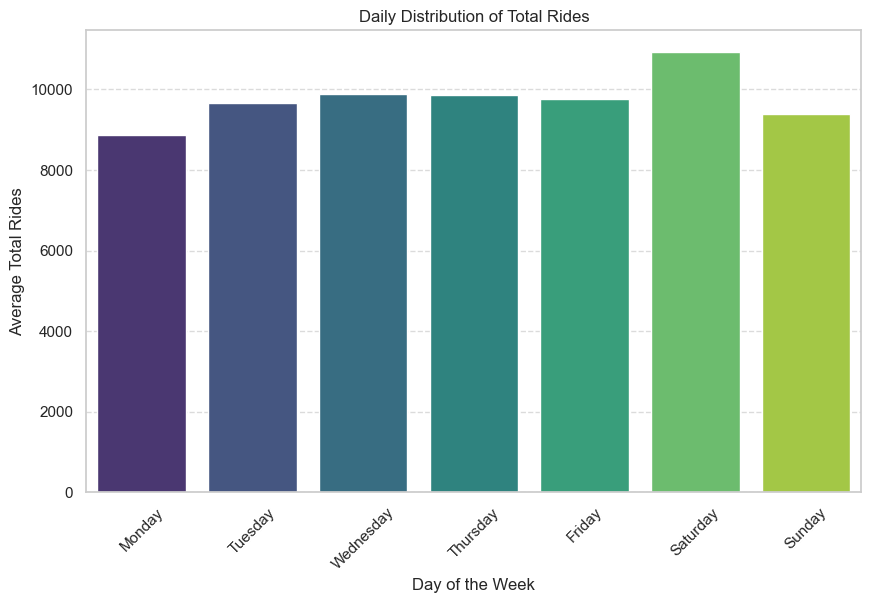

In [419]:
# Which User rides the most in which day?

# Ensure 'Date' column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Extract day of the week from 'Date' (0=Monday, 6=Sunday)
capital_bike_daily_weather['Day_of_Week'] = capital_bike_daily_weather['Date'].dt.dayofweek

# Calculate the average total rides for each day of the week
weekly_rides = capital_bike_daily_weather.groupby('Day_of_Week')['Total_rides'].mean().reset_index()

# Map numeric days to weekday names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_rides['Day_of_Week'] = weekly_rides['Day_of_Week'].apply(lambda x: days[x])

# Plot the weekly distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=weekly_rides, x='Day_of_Week', y='Total_rides', palette='viridis')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Rides')
plt.title('Daily Distribution of Total Rides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_53735/1289863784.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rides, x='Month', y='Total_rides', palette='coolwarm')


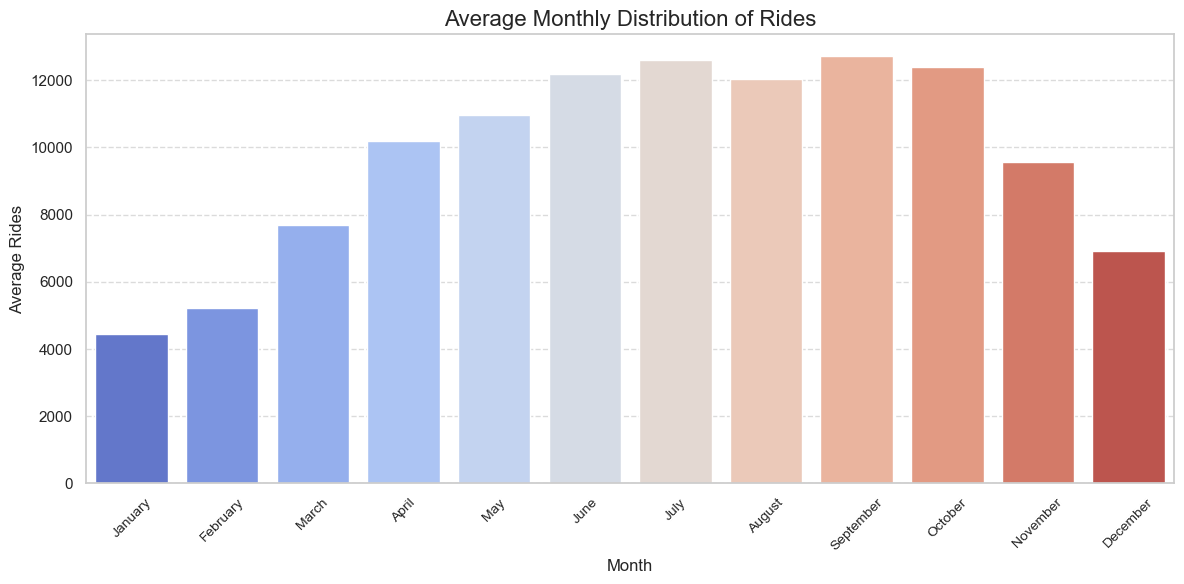

In [420]:
# Ensure 'Date' column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Extract month from 'Date'
capital_bike_daily_weather['Month'] = capital_bike_daily_weather['Date'].dt.month

# Calculate the average total rides for each month
monthly_rides = capital_bike_daily_weather.groupby('Month')['Total_rides'].mean().reset_index()

# Map numeric months to month names
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_rides['Month'] = monthly_rides['Month'].apply(lambda x: months[x - 1])

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_rides, x='Month', y='Total_rides', palette='coolwarm')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Rides')
plt.title('Average Monthly Distribution of Rides', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


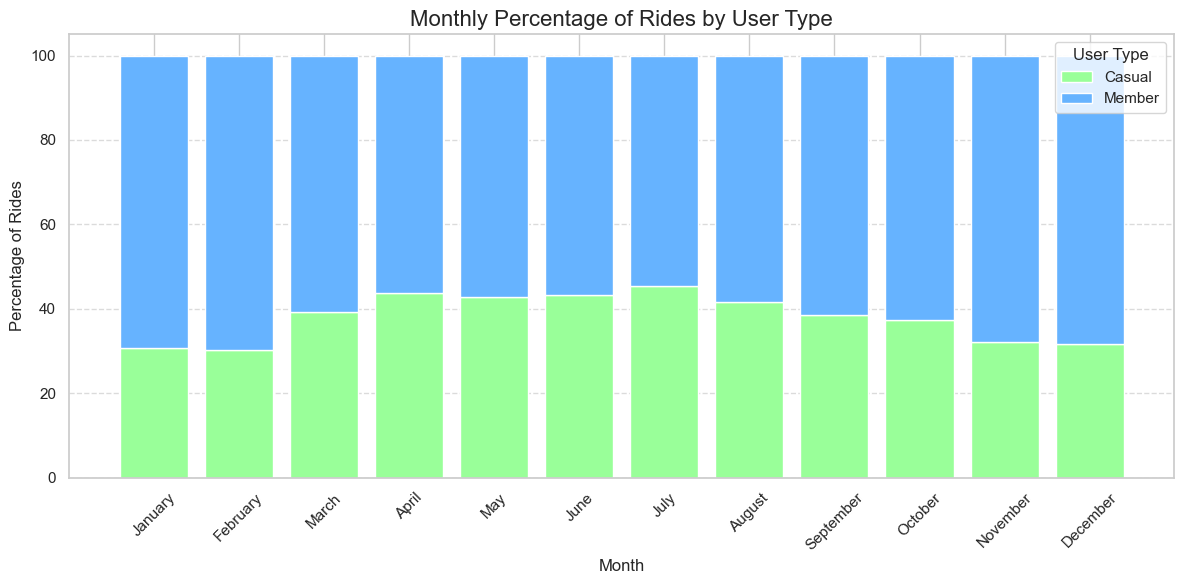

In [421]:
# Ensure 'Date' column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Extract month from 'Date'
capital_bike_daily_weather['Month'] = capital_bike_daily_weather['Date'].dt.month

# Group by month and calculate total rides for 'Member' and 'Casual'
monthly_rides = capital_bike_daily_weather.groupby('Month')[['Member', 'Casual']].sum().reset_index()

# Map numeric months to month names
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_rides['Month'] = monthly_rides['Month'].apply(lambda x: months[x - 1])

# Calculate the percentages
monthly_rides['Member_Percent'] = (monthly_rides['Member'] / (monthly_rides['Member'] + monthly_rides['Casual'])) * 100
monthly_rides['Casual_Percent'] = (monthly_rides['Casual'] / (monthly_rides['Member'] + monthly_rides['Casual'])) * 100

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
bottom_bars = plt.bar(monthly_rides['Month'], monthly_rides['Casual_Percent'], label='Casual', color='#99ff99')
top_bars = plt.bar(monthly_rides['Month'], monthly_rides['Member_Percent'], bottom=monthly_rides['Casual_Percent'], label='Member', color='#66b3ff')

# Adding labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage of Rides', fontsize=12)
plt.title('Monthly Percentage of Rides by User Type', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Column names: Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)', 'Year', 'Day',
       'Season', 'Weather_Name', 'Temperature_Category', 'Feel like',
       'Wind_Speed_Category', 'Holiday', 'Date_numeric', 'Day_of_Week',
       'Month'],
      dtype='object')


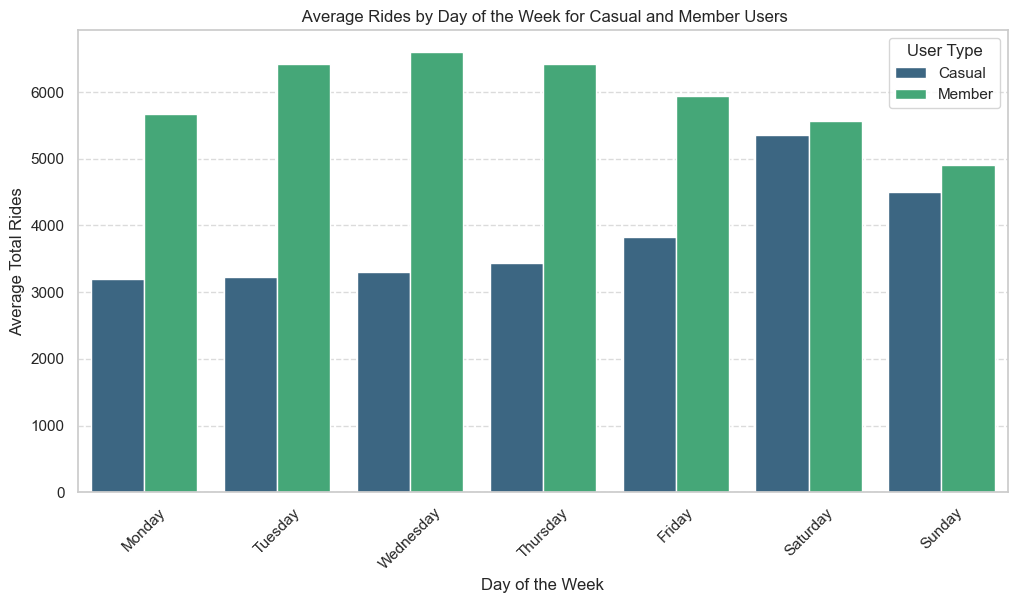

In [422]:
# Ensure 'Date' column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Check the column names
print("Column names:", capital_bike_daily_weather.columns)

# Extract day of the week from 'Date' (0=Monday, 6=Sunday)
capital_bike_daily_weather['Day_of_Week'] = capital_bike_daily_weather['Date'].dt.dayofweek

# Map numeric days to weekday names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
capital_bike_daily_weather['Day_of_Week'] = capital_bike_daily_weather['Day_of_Week'].apply(lambda x: days[x])

# Reshape data to have 'Casual' and 'Member' rides separately (adjust column names if necessary)
user_rides = capital_bike_daily_weather.melt(
    id_vars=['Day_of_Week'], 
    value_vars=['Casual', 'Member'],  # Columns to unpivot (check these names match your DataFrame)
    var_name='User_Type', 
    value_name='Rides'
)

# Group by 'Day_of_Week' and 'User_Type' to get the average total rides per day and user type
weekly_rides_user = user_rides.groupby(['Day_of_Week', 'User_Type'])['Rides'].mean().reset_index()

# Order the days correctly
weekly_rides_user['Day_of_Week'] = pd.Categorical(weekly_rides_user['Day_of_Week'], categories=days, ordered=True)

# Plot the weekly distribution with hue for 'User_Type'
plt.figure(figsize=(12, 6))
sns.barplot(
    data=weekly_rides_user, 
    x='Day_of_Week', 
    y='Rides', 
    hue='User_Type', 
    palette='viridis'
)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Rides')
plt.title(' Average Rides by Day of the Week for Casual and Member Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='User Type', loc='upper right')
plt.show()



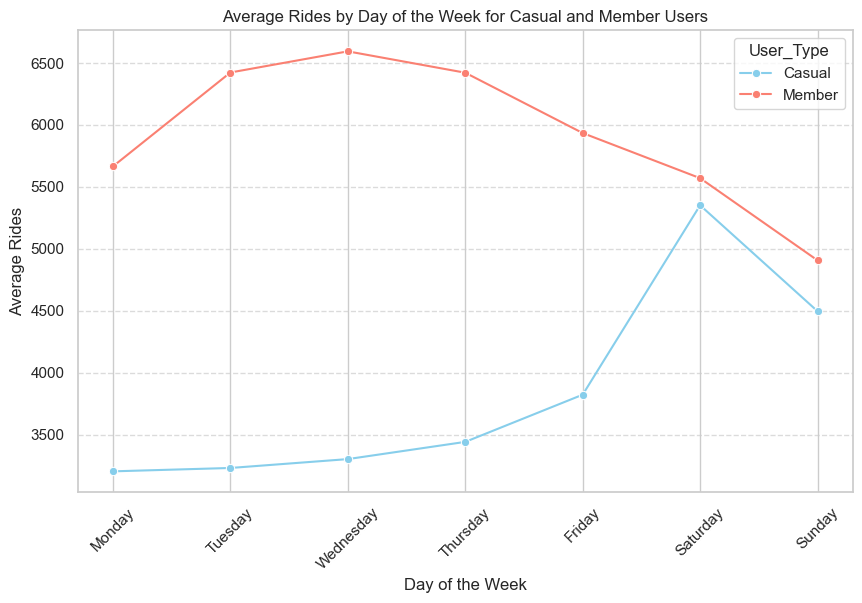

In [423]:
#Ensure the 'Date' column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

#Extract the day of the week from the 'Date' column (0=Monday, 6=Sunday)
capital_bike_daily_weather['Day'] = capital_bike_daily_weather['Date'].dt.dayofweek

#Melt data to long format for easier plotting with Seaborn
daily_rides = capital_bike_daily_weather[['Day', 'Casual', 'Member']].melt(
    id_vars='Day', value_vars=['Casual', 'Member'],
    var_name='User_Type', value_name='Total_Rides'
)

#Group by 'Day' and 'User_Type' and calculate the average rides
daily_rides_avg = daily_rides.groupby(['Day', 'User_Type'])['Total_Rides'].mean().reset_index()

#Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_rides_avg, x='Day', y='Total_Rides', hue='User_Type', marker='o', palette=['skyblue', 'salmon'])

# Set title and labels
plt.title('Average Rides by Day of the Week for Casual and Member Users')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rides')
plt.xticks(ticks=range(0, 7), labels=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], rotation=45)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

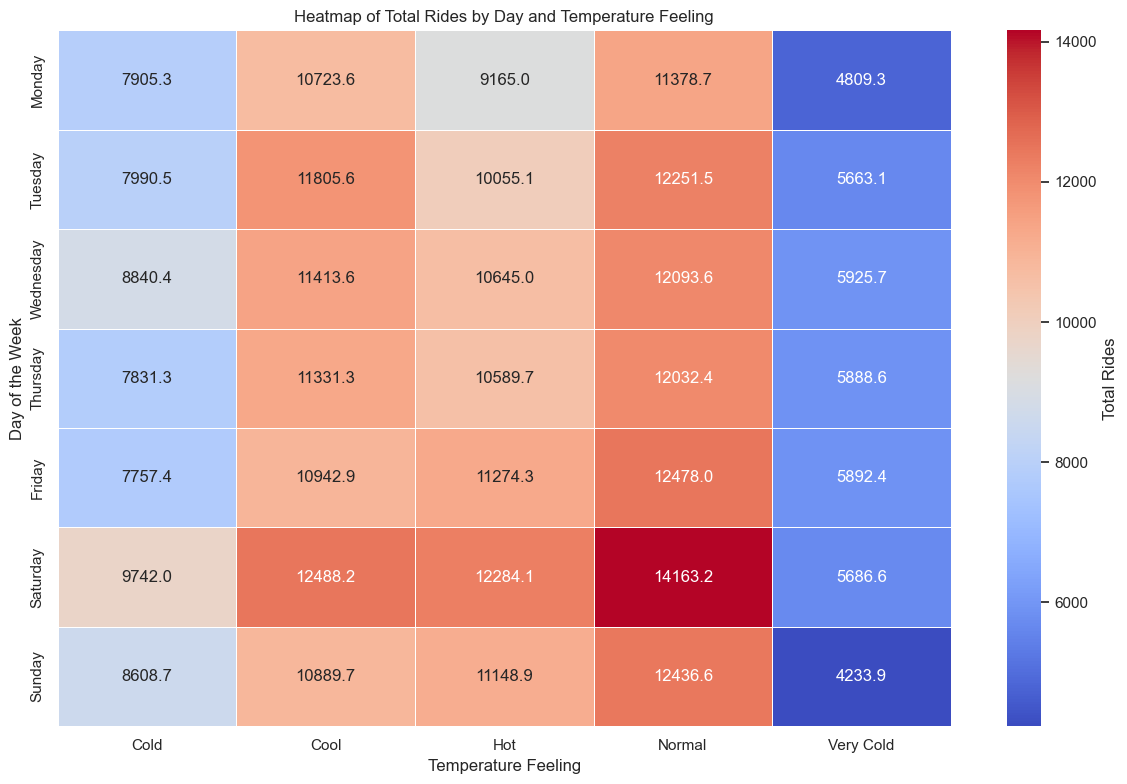

In [424]:
# Ensure 'Day' column exists with proper weekday labels
capital_bike_daily_weather['Day'] = capital_bike_daily_weather['Date'].dt.dayofweek
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
capital_bike_daily_weather['Day'] = capital_bike_daily_weather['Day'].apply(lambda x: days[x])

# Pivot the data
heatmap_data = capital_bike_daily_weather.pivot_table(
    index='Day',  # Rows
    columns='Feel like',  # Columns
    values='Total_rides',  # Values
    aggfunc='mean'  # Aggregation function
)

# Reorder the index to match the days of the week
heatmap_data = heatmap_data.reindex(days)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    cmap="coolwarm", 
    annot=True,  # Display data values
    fmt=".1f",   # Format values
    linewidths=0.5,  # Add grid lines
    cbar_kws={'label': 'Total Rides'}
)

# Add labels and title
plt.title("Heatmap of Total Rides by Day and Temperature Feeling")
plt.xlabel("Temperature Feeling")
plt.ylabel("Day of the Week")
plt.tight_layout()

# Show the plot
plt.show()


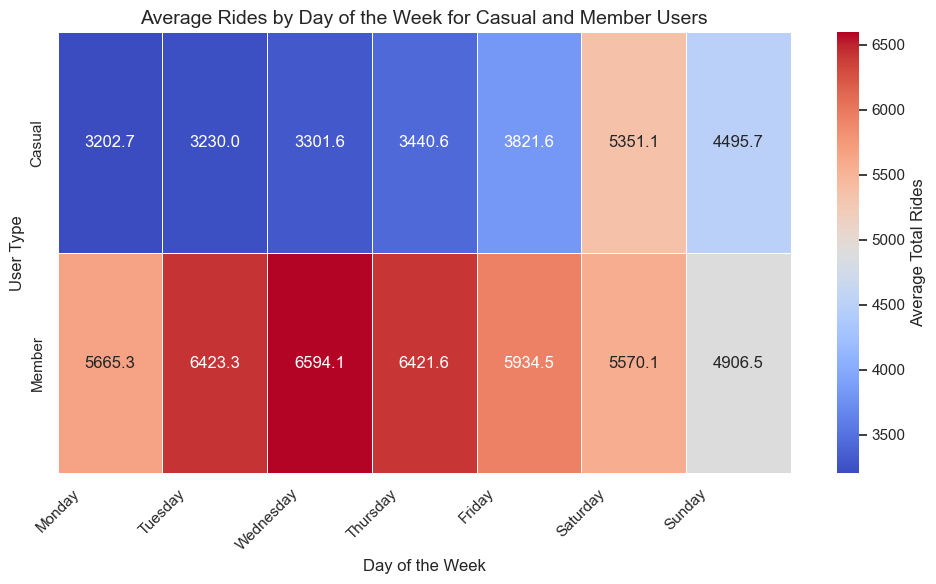

In [425]:
# Ensure the 'Date' column is in datetime format
capital_bike_daily_weather['Date'] = pd.to_datetime(capital_bike_daily_weather['Date'])

# Extract the day of the week from the 'Date' column (0=Monday, 6=Sunday)
capital_bike_daily_weather['Day'] = capital_bike_daily_weather['Date'].dt.dayofweek

# Melt data to long format for easier manipulation
daily_rides = capital_bike_daily_weather[['Day', 'Casual', 'Member']].melt(
    id_vars='Day', value_vars=['Casual', 'Member'],
    var_name='User_Type', value_name='Total_Rides'
)

# Group by 'Day' and 'User_Type' and calculate the average rides
daily_rides_avg = daily_rides.groupby(['Day', 'User_Type'])['Total_Rides'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = daily_rides_avg.pivot(index='User_Type', columns='Day', values='Total_Rides')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, 
    annot=True,  # Show values in the cells
    fmt=".1f",  # Format values to one decimal place
    cmap="coolwarm",  # Use a diverging colormap
    linewidths=0.5,  # Add gridlines
    cbar_kws={'label': 'Average Total Rides'}
)

# Add labels and title
plt.title('Average Rides by Day of the Week for Casual and Member Users', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('User Type', fontsize=12)

# Set custom x-tick labels
plt.xticks(
    ticks=range(7), 
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    rotation=45
)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_53735/2766237314.py:17: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(


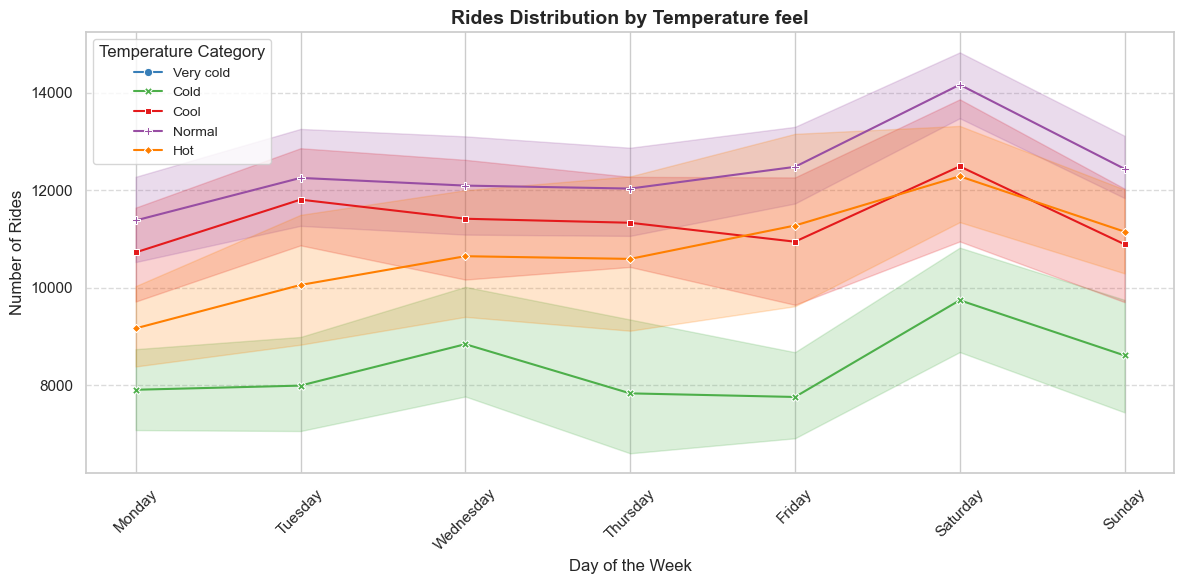

In [426]:
# Define the desired order for Temperature_Category
temperature_order = ['Very cold', 'Cold', 'Cool', 'Normal', 'Hot']

# Reorder the Temperature_Category column in the dataset
capital_bike_daily_weather['Feel like	'] = pd.Categorical(
    capital_bike_daily_weather['Feel like'],
    categories=temperature_order,
    ordered=True
)

# Use a more distinct color palette
custom_palette = sns.color_palette(["#377eb8", "#4daf4a", "#e41a1c", "#984ea3", "#ff7f00", "#ffff33", "#a65628",])

# Plot the rides by day with the new palette
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=capital_bike_daily_weather, 
    x="Day", 
    y="Total_rides", 
    hue="Feel like	", 
    style="Feel like	", 
    markers=True, 
    dashes=False, 
    palette=custom_palette
)

# Ensure proper labeling and ticks for the x-axis
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(7), labels=days, rotation=45)

# Add labels and title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Rides Distribution by Temperature feel", fontsize=14, weight='bold')
plt.legend(title="Temperature Category", fontsize=10)

# Show grid and tighten layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Checking for linear regression trend in scatterplots and preparing data for training and testing

In [427]:
Member = numeric_data["Member"]
Casual = numeric_data['Casual']
A_temp = numeric_data["apparent_temperature_mean (°C)"]
T_rides = numeric_data["Total_rides"]
date = numeric_data['Date_numeric']
#weather = numeric_data['weathercode (wmo code)']
#season = numeric_data['Season_Winter']


print(Member.shape)
print(Casual.shape)
print(A_temp.shape)
print(T_rides.shape)
print(date.shape)
#print(weather.shape)

(1095,)
(1095,)
(1095,)
(1095,)
(1095,)


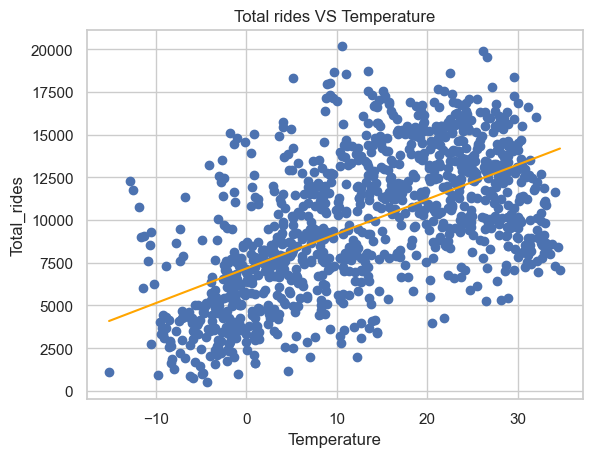

In [428]:
plt.title("Total rides VS Temperature")
plt.xlabel('Temperature')
plt.ylabel('Total_rides')

plt.plot(np.unique(A_temp), np.poly1d(np.polyfit(A_temp, T_rides, 1))(np.unique(A_temp)), color='orange')

plt.scatter(A_temp, T_rides)

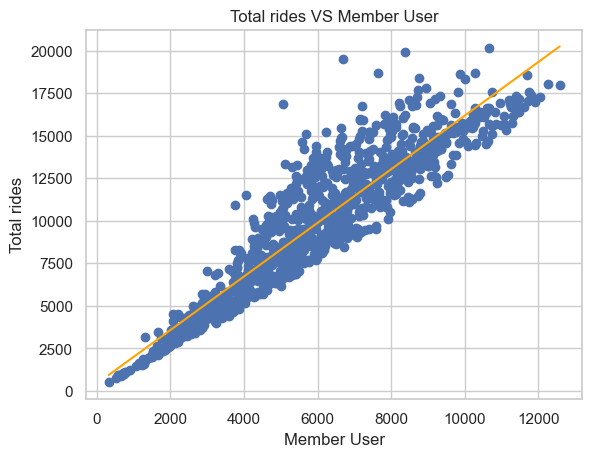

In [429]:
plt.title("Total rides VS Member User")
plt.xlabel('Member User')
plt.ylabel('Total rides')

plt.plot(np.unique(Member), np.poly1d(np.polyfit(Member, T_rides, 1))(np.unique(Member)), color='orange')

plt.scatter(Member, T_rides)

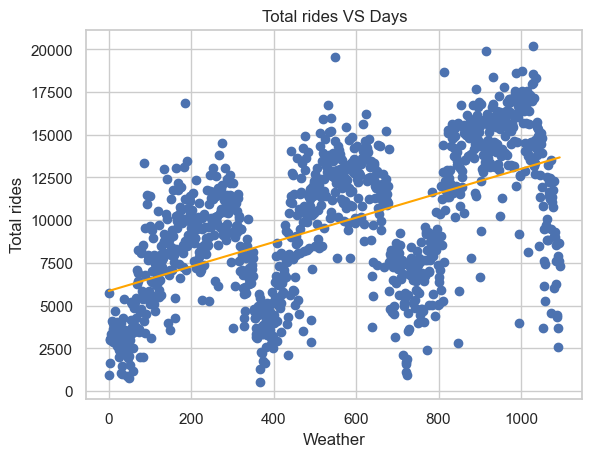

In [430]:
plt.title("Total rides VS Days")
plt.xlabel('Weather')
plt.ylabel('Total rides')

plt.plot(np.unique(date), np.poly1d(np.polyfit(date, T_rides, 1))(np.unique(date)), color='orange')

plt.scatter(date, T_rides)

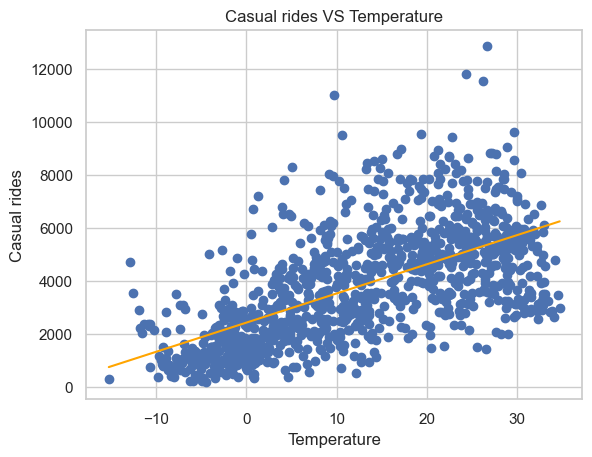

In [431]:
plt.title("Casual rides VS Temperature")
plt.xlabel('Temperature')
plt.ylabel('Casual rides')

plt.plot(np.unique(A_temp), np.poly1d(np.polyfit(A_temp, Casual, 1))(np.unique(A_temp)), color='orange')

plt.scatter(A_temp, Casual)

# Linear Regression Machine Learning Model with Single Variable

In [432]:
# Reshape the dfs to have value for the column instead of a null.

Member = numeric_data["Member"]
Casual = numeric_data['Casual']
A_temp = numeric_data["apparent_temperature_mean (°C)"]
T_rides = numeric_data["Total_rides"]
date = numeric_data['Date_numeric']
#weather = numeric_data['weathercode (wmo code)']
#season = numeric_data['Season_Winter']

Member = Member.values.reshape(-1, 1)
Casual = Casual.values.reshape(-1, 1)
A_temp = A_temp.values.reshape(-1, 1)
T_rides = T_rides.values.reshape(-1, 1)
date = date.values.reshape(-1, 1)


print(Member.shape)
print(Casual.shape)
print(A_temp.shape)
print(T_rides.shape)
print(date.shape)
#print(weather.shape)

(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)


In [433]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [434]:
Member_train, Member_test, T_rides_train, T_rides_test = train_test_split(Member, T_rides, test_size=0.2, random_state=0)

In [435]:
Member_train

array([[ 7005],
       [ 3861],
       [ 4899],
       [ 4455],
       [ 9499],
       [ 8771],
       [ 4297],
       [ 2459],
       [ 5864],
       [ 2497],
       [ 4368],
       [ 4457],
       [12055],
       [ 5265],
       [ 7644],
       [ 1240],
       [  706],
       [ 7168],
       [ 5764],
       [ 9758],
       [ 7987],
       [ 4101],
       [ 5375],
       [ 8781],
       [ 7126],
       [ 5956],
       [ 6731],
       [ 5924],
       [ 5292],
       [ 2582],
       [ 6827],
       [10192],
       [ 3286],
       [ 6810],
       [ 7178],
       [10026],
       [ 4589],
       [ 7895],
       [ 3956],
       [10363],
       [ 3449],
       [ 3397],
       [ 9018],
       [ 7576],
       [10665],
       [ 7218],
       [ 3030],
       [ 9481],
       [ 6737],
       [ 6648],
       [ 8816],
       [ 3514],
       [ 5142],
       [ 7496],
       [ 5981],
       [ 6866],
       [ 4419],
       [ 5176],
       [ 6154],
       [ 6087],
       [ 2958],
       [ 7578],
       [

In [436]:
T_rides_train

array([[13091],
       [ 6565],
       [ 6609],
       [ 7088],
       [14592],
       [11624],
       [ 5599],
       [ 3473],
       [ 9849],
       [ 4471],
       [ 5807],
       [ 7966],
       [17262],
       [ 6939],
       [11121],
       [ 1849],
       [ 1035],
       [ 9316],
       [ 9102],
       [15187],
       [13427],
       [ 7124],
       [ 6843],
       [14388],
       [ 9289],
       [14028],
       [10839],
       [ 7844],
       [11719],
       [ 4072],
       [ 9738],
       [15929],
       [ 5080],
       [11394],
       [11682],
       [15524],
       [ 9748],
       [12870],
       [ 5653],
       [16141],
       [ 5182],
       [ 4268],
       [13548],
       [12272],
       [15682],
       [16757],
       [ 5419],
       [12555],
       [ 9660],
       [ 9950],
       [13136],
       [ 5056],
       [ 8565],
       [15187],
       [13479],
       [12509],
       [ 7003],
       [11028],
       [ 9148],
       [ 9185],
       [ 4677],
       [12429],
       [

In [437]:
# Train the model

reg_area = linear_model.LinearRegression()
reg_area.fit(Member_train, T_rides_train)


LinearRegression()

In [438]:
# Predict values using test data.
reg_area_score = (reg_area.score(Member_test, T_rides_test) * 100)
print("The accuracy of the ML model based on Total rides by Member is:", reg_area_score , "%")

The accuracy of the ML model based on Total rides by Member is: 82.72418646357251 %


In [439]:
A_temp_train, A_temp_test, T_rides_train, T_rides_test = train_test_split(A_temp, T_rides, test_size=0.2, random_state=0)
A_temp

array([[-0.9],
       [ 4.8],
       [ 0.9],
       ...,
       [-7.8],
       [-7.3],
       [-8.9]])

In [440]:
# Train the model

reg_area = linear_model.LinearRegression()
reg_area.fit(A_temp_train, T_rides_train)


LinearRegression()

In [441]:
# Predict values using test data.
reg_area_score = (reg_area.score(A_temp_test, T_rides_test) * 100)
print("The accuracy of the ML model based on Total rides by Member is:", reg_area_score , "%")


The accuracy of the ML model based on Total rides by Member is: 33.04161186583499 %


In [442]:
date_train, date_test, T_rides_train, T_rides_test = train_test_split(date, T_rides, test_size=0.2, random_state=0)
date

array([[   0],
       [   1],
       [   2],
       ...,
       [1092],
       [1093],
       [1094]])

In [443]:
# Train the model

reg_area = linear_model.LinearRegression()
reg_area.fit(date_train, T_rides_train)


LinearRegression()

In [444]:
# Predict values using test data.
reg_area_score = (reg_area.score(date_test, T_rides_test) * 100)
print("The accuracy of the ML model based on Total rides by Days:", reg_area_score , "%")


The accuracy of the ML model based on Total rides by Days: 31.406454260249028 %


In [445]:
A_temp_train, A_temp_test, Casual_train, Casual_test = train_test_split(A_temp, Casual, test_size=0.2, random_state=0)


In [446]:
# Train the model

reg_area = linear_model.LinearRegression()
reg_area.fit(A_temp_train, Casual_train)


LinearRegression()

In [447]:
# Predict values using test data.
reg_area_score = (reg_area.score(A_temp_test, Casual_test) * 100)
print("The accuracy of the ML model based on Casual rides by Temperature:", reg_area_score , "%")

The accuracy of the ML model based on Casual rides by Temperature: 36.51984802963325 %


# Linear Regression Machine Learning Model with Multi Variable

In [448]:

# Mapping days to numbers
day_mapping = {
    'Day_Monday': 0,
    'Day_Tuesday': 1,
    'Day_Wednesday': 2,
    'Day_Thursday': 3,
    'Day_Friday': 4,
    'Day_Saturday': 5,
    'Day_Sunday': 6
}
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
# Extract the day columns
day_columns = ['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 
               'Day_Thursday', 'Day_Saturday', 'Day_Sunday']

# Add a new 'Day_Encoded' column with the numerical encoding
numeric_data['Day_Encoded'] = (
    numeric_data[day_columns]  # Select the day columns
    .dot(range(len(day_columns)))            # Multiply by [0, 1, 2, ...]
)
numeric_data['Day_Encoded'] = pd.Categorical(numeric_data['Day_Encoded'],
categories=[0, 1, 2, 3, 4, 5, 6])
numeric_data



,Casual,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Date_numeric,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Season_Spring,Season_Summer,Season_Winter,Holiday_Yes,Day_Encoded
0,371,590,961,-0.9,2.3,63,10.6,0,False,False,False,False,False,False,False,False,True,True,0
1,2874,2844,5718,4.8,7.6,61,19.1,1,False,True,False,False,False,False,False,False,True,False,4
2,495,1133,1628,0.9,3.9,63,13.0,2,False,False,True,False,False,False,False,False,True,False,5
3,907,2074,2981,1.0,4.1,3,13.3,3,True,False,False,False,False,False,False,False,True,False,0
4,1057,2004,3061,1.4,4.0,51,9.2,4,False,False,False,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,1934,2580,-8.6,-4.3,71,10.1,1090,False,False,False,False,False,True,False,False,True,False,2
1091,3099,4819,7918,-7.0,-2.5,0,12.8,1091,False,False,False,True,False,False,False,False,True,False,3
1092,3491,5168,8659,-7.8,-3.9,1,9.5,1092,False,False,False,False,False,False,False,False,True,False,0
1093,3097,4497,7594,-7.3,-2.9,1,13.8,1093,False,True,False,False,False,False,False,False,True,False,4


In [449]:
# Mapping days to numbers
day2_mapping = {
    'Day_Monday': 0,
    'Day_Tuesday': 1,
    'Day_Wednesday': 2,
    'Day_Thursday': 3,
    'Day_Friday': 4,
    'Day_Saturday': 5,
    'Day_Sunday': 6
}

# Replace day column values with their numerical encoding
for day, num in day2_mapping.items():
    if day in numeric_data.columns:
        numeric_data[day] = numeric_data[day].apply(lambda x: num if x == 1 else 0)

# Display the updated DataFrame
numeric_data


,Casual,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Date_numeric,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Season_Spring,Season_Summer,Season_Winter,Holiday_Yes,Day_Encoded
0,371,590,961,-0.9,2.3,63,10.6,0,0,0,0,0,0,0,False,False,True,True,0
1,2874,2844,5718,4.8,7.6,61,19.1,1,0,5,0,0,0,0,False,False,True,False,4
2,495,1133,1628,0.9,3.9,63,13.0,2,0,0,6,0,0,0,False,False,True,False,5
3,907,2074,2981,1.0,4.1,3,13.3,3,0,0,0,0,0,0,False,False,True,False,0
4,1057,2004,3061,1.4,4.0,51,9.2,4,0,0,0,0,1,0,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,1934,2580,-8.6,-4.3,71,10.1,1090,0,0,0,0,0,2,False,False,True,False,2
1091,3099,4819,7918,-7.0,-2.5,0,12.8,1091,0,0,0,3,0,0,False,False,True,False,3
1092,3491,5168,8659,-7.8,-3.9,1,9.5,1092,0,0,0,0,0,0,False,False,True,False,0
1093,3097,4497,7594,-7.3,-2.9,1,13.8,1093,0,5,0,0,0,0,False,False,True,False,4


In [450]:
multivariate = numeric_data.drop(['Casual','Member','Season_Winter', 'Season_Spring','Season_Summer', 'Day_Monday','Day_Saturday', 'Day_Sunday',  'Day_Tuesday','Day_Wednesday','temperature_2m_mean (°C)','Date_numeric'], axis='columns')
M = capital_bike_daily_weather[['Total_rides']]

print(multivariate.shape)
print(M.shape)



(1095, 7)
(1095, 1)


In [451]:
type(M)

pandas.core.frame.DataFrame

In [452]:
multivariate.columns
multivariate

,Total_rides,apparent_temperature_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Day_Thursday,Holiday_Yes,Day_Encoded
0,961,-0.9,63,10.6,0,True,0
1,5718,4.8,61,19.1,0,False,4
2,1628,0.9,63,13.0,0,False,5
3,2981,1.0,3,13.3,0,False,0
4,3061,1.4,51,9.2,0,False,1
...,...,...,...,...,...,...,...
1090,2580,-8.6,71,10.1,0,False,2
1091,7918,-7.0,0,12.8,3,False,3
1092,8659,-7.8,1,9.5,0,False,0
1093,7594,-7.3,1,13.8,0,False,4


In [453]:
multivariate.head()

,Total_rides,apparent_temperature_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),Day_Thursday,Holiday_Yes,Day_Encoded
0,961,-0.9,63,10.6,0,True,0
1,5718,4.8,61,19.1,0,False,4
2,1628,0.9,63,13.0,0,False,5
3,2981,1.0,3,13.3,0,False,0
4,3061,1.4,51,9.2,0,False,1


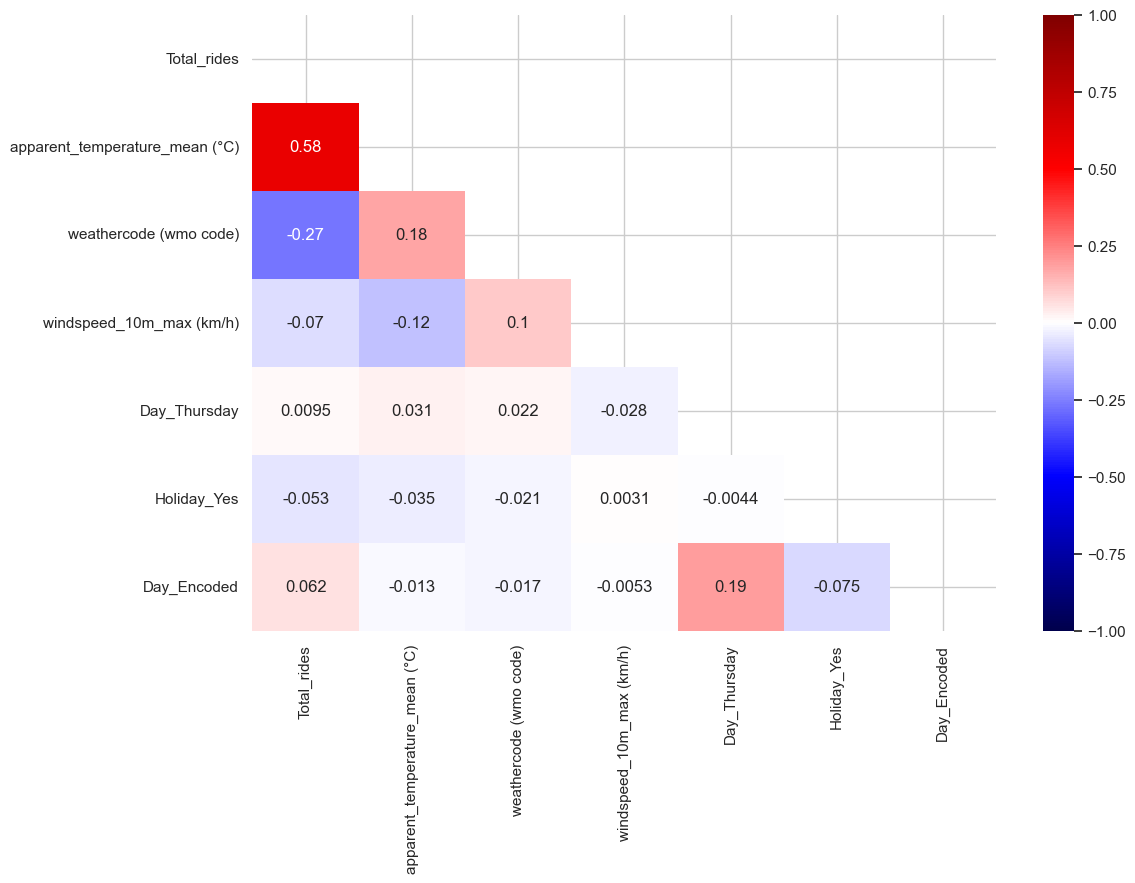

In [454]:
plt.figure(figsize=(12,8))
corr= multivariate.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [455]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Casual                          1095 non-null   int64   
 1   Member                          1095 non-null   int64   
 2   Total_rides                     1095 non-null   int64   
 3   apparent_temperature_mean (°C)  1095 non-null   float64 
 4   temperature_2m_mean (°C)        1095 non-null   float64 
 5   weathercode (wmo code)          1095 non-null   int64   
 6   windspeed_10m_max (km/h)        1095 non-null   float64 
 7   Date_numeric                    1095 non-null   int64   
 8   Day_Monday                      1095 non-null   int64   
 9   Day_Saturday                    1095 non-null   int64   
 10  Day_Sunday                      1095 non-null   int64   
 11  Day_Thursday                    1095 non-null   int64   
 12  Day_Tuesday         

In [456]:

#multivariate = numeric_data.drop(['Total_rides','Casual','Member','Season_Winter', 'Season_Spring','Season_Summer', 'Day_Monday','Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday','Day_Wednesday','temperature_2m_mean (°C)','Date_numeric'], axis='columns')
multivariate = numeric_data[['temperature_2m_mean (°C)','weathercode (wmo code)', 'Day_Encoded']]
M = capital_bike_daily_weather[['Total_rides']]

print(multivariate.shape)
print(M.shape)



(1095, 3)
(1095, 1)


In [457]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [458]:
# Split the data into training and testing sets
multivariate_train, multivariate_test, M_train, M_test = train_test_split(multivariate, M, test_size=0.2, random_state=10)

In [459]:
# Train the model

reg_multi = linear_model.LinearRegression()
reg_multi.fit(multivariate_train, M_train)


LinearRegression()

In [460]:
# Calculate and round the accuracy score
reg_multi_score = round(reg_multi.score(multivariate_test, M_test) * 100, 2)

# Print the accuracy
print("The accuracy of the ML model is:", reg_multi_score, "%")


The accuracy of the ML model is: 53.19 %


In [461]:



# Make predictions on the test set
M_pred = reg_multi.predict(multivariate_test)

# Calculate MSE and R²
mse = mean_squared_error(M_test, M_pred)
r2 = r2_score(M_test, M_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 8686634.83
R² Score: 0.53


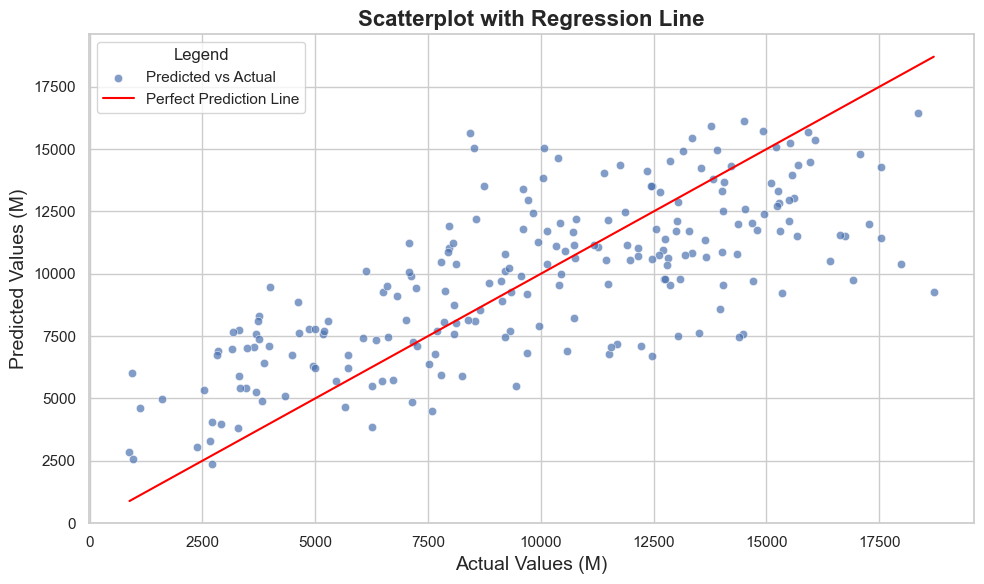

In [462]:
# Ensure that M_test and M_pred are 1-dimensional
M_test_flat = M_test.values.ravel() if hasattr(M_test, 'values') else M_test.ravel()
M_pred_flat = M_pred.ravel()

# Set a style for better aesthetics
sns.set(style="whitegrid")

# Create the scatterplot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=M_test_flat, y=M_pred_flat, alpha=0.7, color="#4c72b0", label="Predicted vs Actual")
sns.lineplot(x=M_test_flat, y=M_test_flat, color="red", label="Perfect Prediction Line")

# Add labels, title, and legend
plt.title("Scatterplot with Regression Line", fontsize=16, fontweight='bold')
plt.xlabel("Actual Values (M)", fontsize=14)
plt.ylabel("Predicted Values (M)", fontsize=14)
plt.legend(title="Legend")

# Display the plot
plt.tight_layout()
plt.show()


In [463]:


# Define multivariate features and target variable
multivariate = numeric_data[['temperature_2m_mean (°C)','weathercode (wmo code)', 'Day_Encoded']]
M = capital_bike_daily_weather[['Total_rides']]

# Check shapes
print(multivariate.shape)
print(M.shape)

# 
# Split the data into train and test sets
multivariate_train, multivariate_test, M_train, M_test = train_test_split(multivariate, M, test_size=0.2, random_state=10)

# Apply Polynomial Feature Transformation (e.g., degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)  # include_bias=False removes the constant column
multivariate_train_poly = poly.fit_transform(multivariate_train)
multivariate_test_poly = poly.transform(multivariate_test)

# Train the Polynomial Regression Model
poly_reg = LinearRegression()
poly_reg.fit(multivariate_train_poly, M_train)

# Evaluate the Model
# Predict on test data
M_pred = poly_reg.predict(multivariate_test_poly)

# Calculate metrics
mse = mean_squared_error(M_test, M_pred)
r2 = r2_score(M_test, M_pred)

# Display metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Print model coefficients
print("Model Coefficients:", poly_reg.coef_)
print("Model Intercept:", poly_reg.intercept_)


(1095, 3)
(1095, 1)
Mean Squared Error (MSE): 7880242.88
R² Score: 0.58
Model Coefficients: [[ 4.29364012e+02  4.76130404e+01  2.31012316e+02 -5.54992064e+00
  -5.69165223e-01  6.86254801e+00 -1.53552420e+00  3.50436503e-01
  -2.96586500e+01]]
Model Intercept: [5891.83805648]


/opt/anaconda3/envs/jaamann/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


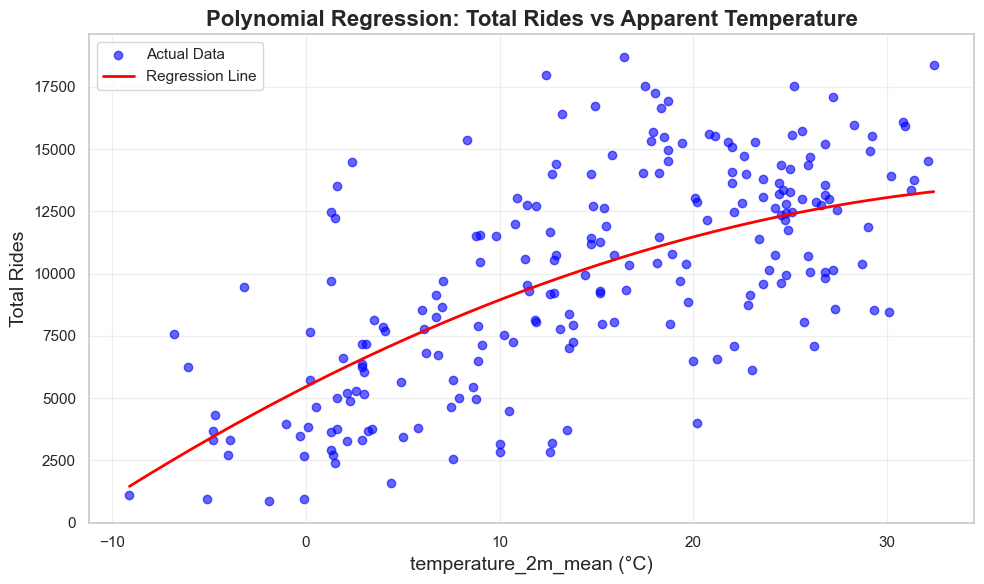

In [464]:

# Single feature for scatterplot visualization
feature_column = 'temperature_2m_mean (°C)'
multivariate_single = multivariate[[feature_column]]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(multivariate_single, M, test_size=0.2, random_state=10)

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Generate predictions
y_pred = poly_reg.predict(X_test_poly)

# Plot the scatterplot and regression line
plt.figure(figsize=(10, 6))

# Scatterplot of the original data
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data')

# Regression line
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)  # Generate range of X values
X_range_poly = poly.transform(X_range)  # Transform X values to polynomial features
y_range_pred = poly_reg.predict(X_range_poly)  # Predict using the model
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.title("Polynomial Regression: Total Rides vs Apparent Temperature", fontsize=16, fontweight='bold')
plt.xlabel(feature_column, fontsize=14)
plt.ylabel("Total Rides", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [465]:
# Define the day you want to predict for (e.g., 0=Monday, 1=Tuesday, ..., 6=Sunday)
Day = 1  # Example: Tuesday

# Ensure multivariate.columns matches the feature set used during training
input_features = [3] * len(multivariate.columns)

# Assign the day encoding to the correct column
if 'Day_Encoded' in multivariate.columns:
    # Ensure 'Day_Encoded' is part of the model features
    input_features[multivariate.columns.get_loc('Day_Encoded')] = Day

# Ensure the input matches the trained model's expectations
input_features = input_features[:len(multivariate.columns)]  # Adjust length if necessary

# Predict the total rides for the given day
pred_2 = reg_multi.predict([input_features])  # Ensure it's a 2D list

# Convert prediction to a scalar
predicted_value = float(pred_2[0])

# Print the formatted prediction
print(f"The predicted demand for bikes on day {Day} (encoded) is approximately: {predicted_value:.2f} rides.")

The predicted demand for bikes on day 1 (encoded) is approximately: 7386.63 rides.


/opt/anaconda3/envs/jaamann/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_53735/7996016.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_value = float(pred_2[0])
